# Programa de capacitação

**Introdução à comunicações digitais**

Adolfo Fernandes Herbster

<a href="https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/" target="_blank">https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/</a>

<a href="mailto:adolfofh@dee.ufcg.edu.br">adolfofh@dee.ufcg.edu.br</a>

Embedded/DEE/CEEI/UFCG - 2019

In [471]:
%matplotlib inline
import numpy as num
import matplotlib.pyplot as plt
from scipy import signal

## Transmissão digital em banda base ( e mais transformada de Fourier ...)

Entende-se por transmissão digital em banda base, a transmissão de sinais digitais cujo espectro está centrado na frequência
0 Hz. Por exemplo, considere um conjunto de pulsos retangulares:

In [495]:
F = 5;    # 5 Hz
Fs = 500; # Sampling rate per second
t = num.linspace(0, 1, Fs, endpoint=False)
x = signal.square(2 * num.pi * F * t);

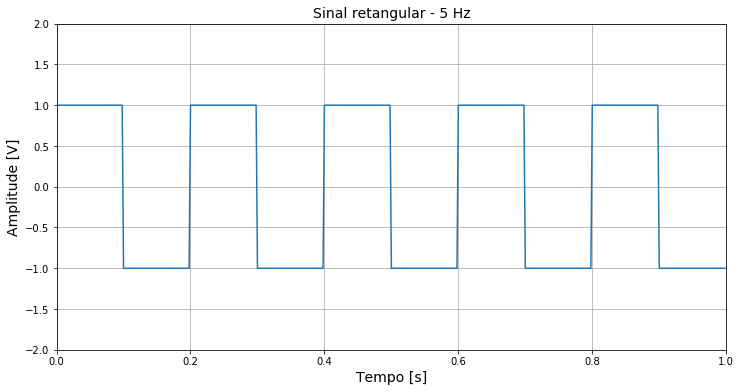

In [496]:
plt.figure(figsize=(12,6))
plt.plot(t, x)
plt.xlabel('Tempo [s]', fontsize = 14);
plt.ylabel('Amplitude [V]', fontsize = 14);
plt.title('Sinal retangular - 5 Hz', fontsize = 14);
plt.ylim(-2, 2);
plt.xlim(0, 1);
plt.grid();

Como o período do sinal é $T = 2$s, o sinal é repetido a cada 2s. O sinal no domínio da frequência é obtido a partir de

In [497]:
X = num.fft.fftshift(num.fft.fft(x));
f = num.linspace(-Fs/2, Fs/2, len(t), endpoint=False)

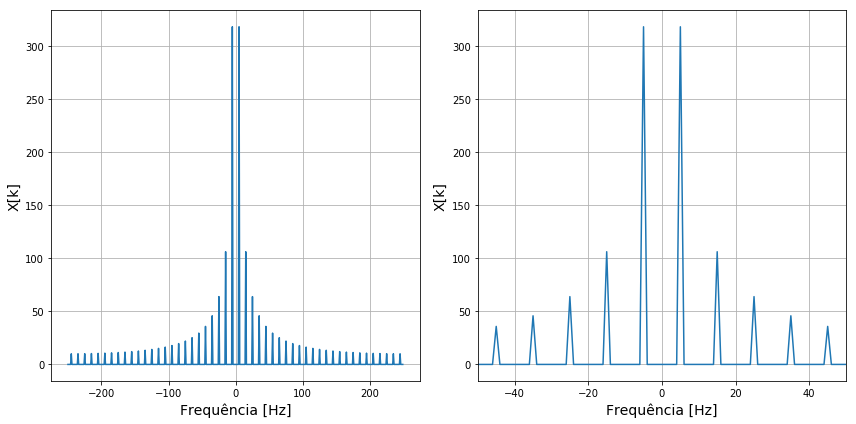

In [498]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(f, num.abs(X));
plt.xlabel("Frequência [Hz]", fontsize = 14);
plt.ylabel("X[k]", fontsize = 14);
plt.grid(True);

plt.subplot(122)
plt.plot(f, num.abs(X));
plt.xlabel("Frequência [Hz]", fontsize = 14);
plt.ylabel("X[k]", fontsize = 14);
plt.grid(True);
plt.xlim(-50,50);
plt.tight_layout();

Como o período do sinal é $T = 2$s, a densidade espectral de potência do sinal é diferente de zero a cada $1/T$ = 5Hz. Vejamos agora apenas um pulso:

In [499]:
def rect(t, tau):
    return (abs(t) < tau).astype(float)

In [500]:
N  = 1024;
Fs = 100 # sampling rate in Hz
t_a  = num.arange(-0.5, 0.5, 1/Fs);
tau = 0.05;
x_a = rect(t_a, tau);
f_a = num.arange(-Fs/2, Fs/2, Fs/N);
X_a = num.fft.fftshift(num.fft.fft(x_a, N));

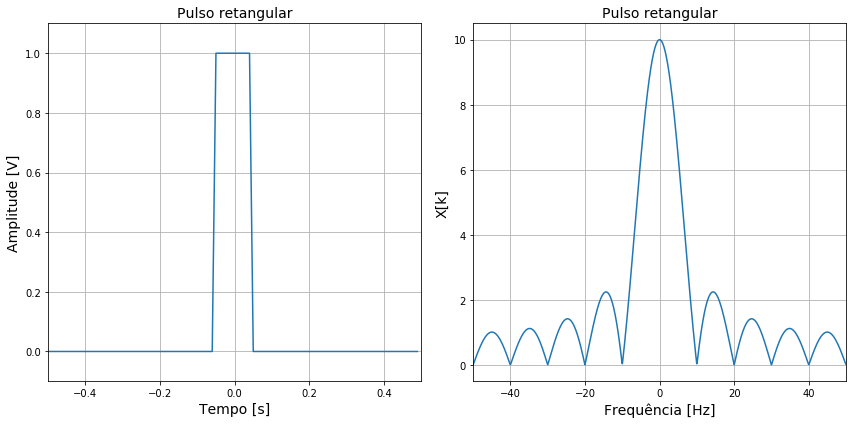

In [501]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(t_a, x_a)
plt.grid()
plt.ylim([-0.1,1.1])
plt.xlim([-0.5,0.5])
plt.title("Pulso retangular", fontsize = 14);
plt.xlabel("Tempo [s]", fontsize = 14);
plt.ylabel("Amplitude [V]", fontsize = 14);

plt.subplot(122)
plt.plot(f_a, num.abs(X_a))
plt.grid()
plt.title("Pulso retangular", fontsize = 14);
plt.xlabel("Frequência [Hz]", fontsize = 14);
plt.ylabel("X[k]", fontsize = 14);
plt.xlim(-50,50);
plt.tight_layout();

Podemos observar o seguinte:

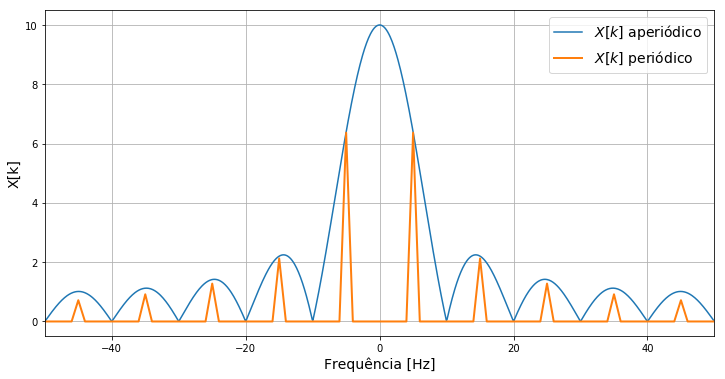

In [502]:
plt.figure(figsize=(12,6))
plt.plot(f_a, num.abs(X_a), '-', label='$X[k]$ aperiódico');
plt.plot(f,   num.abs(X)/50,     label='$X[k]$ periódico', lw=2);
plt.xlabel("Frequência [Hz]", fontsize = 14);
plt.ylabel("X[k]", fontsize = 14);
plt.xlim(-50,50);
plt.grid();
plt.legend(fontsize = 14);

Vamos considerar outro exemplo. Considere agora um pulso triangular:

In [503]:
def triang(t):
    return (1-abs(t)) * (abs(t)<1).astype(float)

t0 = 10;
tau = 0.05;
Fs = 10000;
N = 1024;

t = num.arange(-t0, t0, 1./Fs)
f = num.linspace(-Fs/2, Fs/2, len(t), endpoint=False)

x = triang(t);

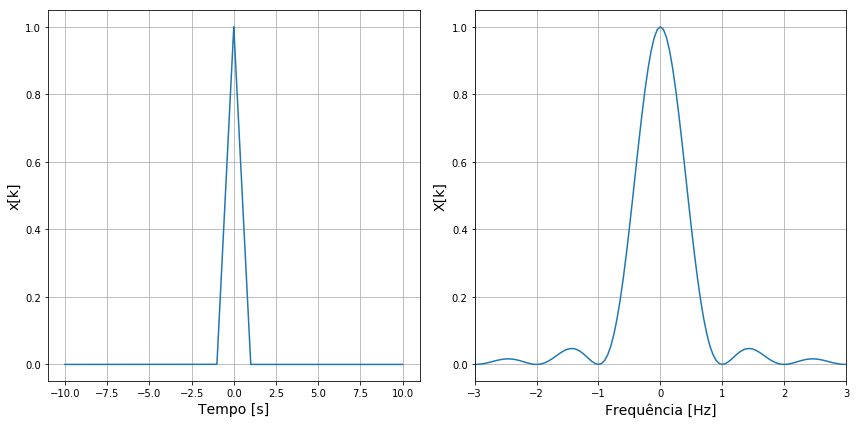

In [504]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(t, x);
plt.grid();
plt.xlabel("Tempo [s]", fontsize = 14);
plt.ylabel("x[k]", fontsize = 14);

plt.subplot(122)
X = num.fft.fftshift(num.fft.fft(x)) * num.exp(-2j*num.pi*f*t0) * 1/Fs;
plt.plot(f, num.abs(X));
plt.xlim(-3,3);
plt.grid();
plt.xlabel("Frequência [Hz]", fontsize = 14);
plt.ylabel("X[k]", fontsize = 14);
plt.tight_layout();

In [505]:
def periodic_triang(t):
    return triang(num.mod(t+1, 2)-1)
xp = periodic_triang(t);

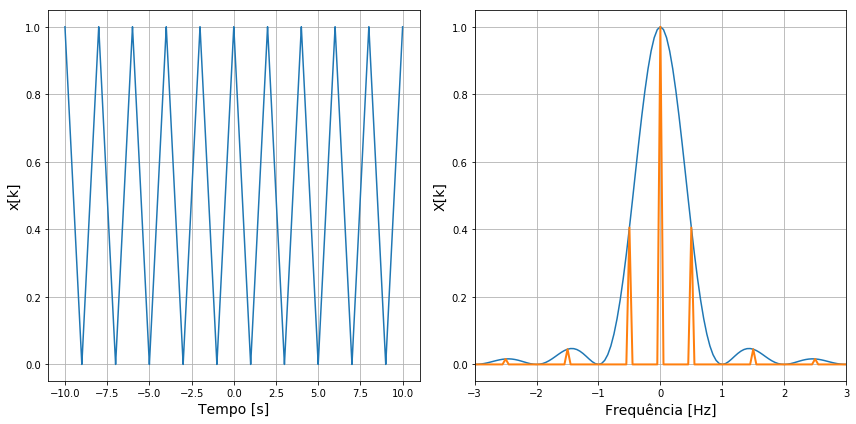

In [506]:
plt.figure(figsize=(12,6))
plt.subplot(121);
plt.plot(t, xp);
plt.grid();
plt.xlabel("Tempo [s]", fontsize = 14);
plt.ylabel("x[k]", fontsize = 14);

plt.subplot(122)
Xp = num.fft.fftshift(num.fft.fft(periodic_triang(t)) / Fs / 10);
plt.plot(f, num.abs(X), '-', label='$X(f)$ (periodic)')
plt.plot(f, num.abs(Xp), label='$X(f)$ non-periodic', lw=2); 
plt.xlim(-3,3);
plt.grid();
plt.xlabel("Frequência [Hz]", fontsize = 14);
plt.ylabel("X[k]", fontsize = 14);
plt.tight_layout();